# Time series analysis (Pandas)


Nikolay Koldunov

koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

Here I am going to show just some basic [pandas](http://pandas.pydata.org/) stuff for time series analysis, as I think for the Earth Scientists it's the most interesting topic. If you find this small tutorial useful, I encourage you to watch [this video](http://pyvideo.org/video/1198/time-series-data-analysis-with-pandas), where Wes McKinney give extensive introduction to the time series data analysis with pandas.

On the official website you can find explanation of what problems pandas solve in general, but I can tell you what problem pandas solve for me. It makes analysis and visualisation of 1D data, especially time series, MUCH faster. Before pandas working with time series in python was a pain for me, now it's fun. Ease of use stimulate in-depth exploration of the data: why wouldn't you make some additional analysis if it's just one line of code? Hope you will also find this great tool helpful and useful. So, let's begin.

## Module import

First we have to import necessary modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
pd.set_option('max_rows',15) # this limit maximum numbers of rows
np.set_printoptions(precision=3 , suppress= True) # this is just to make the output look better


In [2]:
pd.__version__

'0.20.3'

## Loading data

Now, when we are done with preparations, let's get some data.

Pandas has very good IO capabilities and we are going to use them to load our data and convert it to the time series:

In [3]:
more ./DelhiTmax.txt

In [4]:
tmax = pd.read_csv('./DelhiTmax.txt',delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)

Here we read our data from file, telling pandas, that delimiter is a space, that it has to combine information in the 0th, 1st and 2nd columns and try to understand it as a date, and that there is no header presented in the original data.

In [5]:
tmax

,0_1_2,3
0,1944-01-01,22.2
1,1944-01-03,23.9
2,1944-01-04,22.2
3,1944-01-06,22.8
4,1944-01-07,22.2
5,1944-01-08,16.7
6,1944-01-09,20.6
...,...,...
15429,2015-02-22,28.6
15430,2015-02-23,28.6


Rename columns:

In [6]:
tmax.columns = ['Date', 'Temp']

Set "Date" column to be our index (instead of 1,2,3....), so pandas can understand, that our data is actually a time series.

In [7]:
tmax = tmax.set_index(['Date'])

In [8]:
tmax.head(3)

,Temp
Date,
1944-01-01,22.2
1944-01-03,23.9
1944-01-04,22.2


Now we can plot the complete time series:

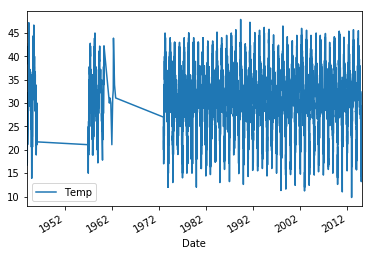

In [9]:
tmax.plot()

or its part:

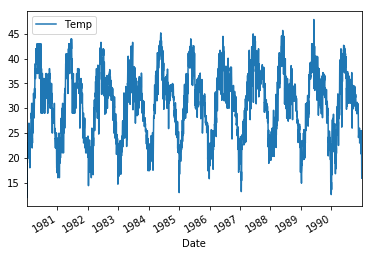

In [10]:
tmax['1980':'1990'].plot()

or even smaller part:

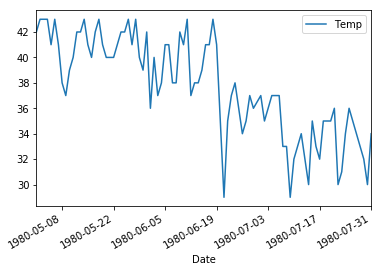

In [11]:
tmax['1980-05':'1980-07'].plot()

Reference to the time periods is done in a very natural way. You, of course, can also get individual values. By index (date in our case): 

In [12]:
tmax['1980-01-02':'1980-01-02']

,Temp
Date,
1980-01-02,16.0


By exact location:

In [13]:
tmax.iloc[120]

Temp    35.0
Name: 1944-06-17 00:00:00, dtype: float64

And what if we choose only one month?

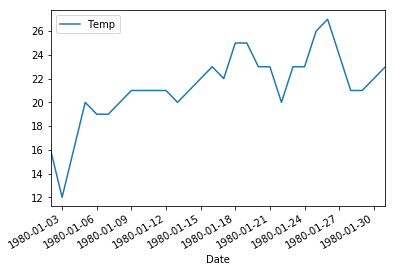

In [14]:
tmax['1980-01'].plot()

Isn't that great? :)

## Exercise

What was temperature in Delhi at your burthsday (or at the closest day)?

## One bonus example :)

This is a plot of all temperatures larger than 35  degrees Celsius. What can we learn from this plot?

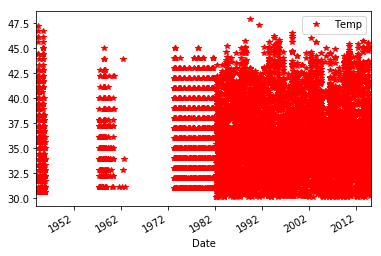

In [15]:
tmax[tmax > 30].plot(style='r*')

## Exercise

plot all temperatures larger than 10 (red stars) and temperatires lower than 10 (blue stars)
limit this plot by 1990-2013 period

## Multiple columns

Now let's make live a bit more interesting and get more data. This will be TMIN time series.

In [16]:
tmin = pd.read_csv('./DelhiTmin.txt',delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)
tmin.columns = ['Date', 'Temp']
tmin = tmin.set_index(['Date'])

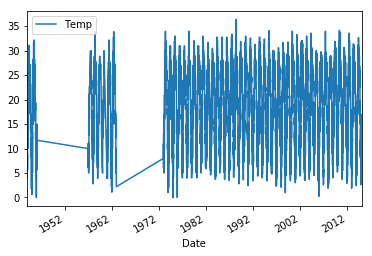

In [17]:
tmin.plot()

Note, that number of values in `tmin` and `tmax` are not the same:

In [18]:
tmin.describe()

,Temp
count,14208.000000
mean,18.530961
std,7.808766
min,0.000000
25%,11.400000
50%,19.500000
75%,25.600000
max,36.400000


In [19]:
tmax.describe()

,Temp
count,15436.000000
mean,31.402131
std,6.740111
min,9.800000
25%,26.200000
50%,32.600000
75%,36.100000
max,47.900000


We are going to create empty DataFrame with indeces for every day and then fill them in with TMIN and TMAX (where they are exist) 

Create index (use period_range):

In [20]:
dd = pd.date_range('1944-01','2015-03',freq='D')

In [21]:
dd

DatetimeIndex(['1944-01-01', '1944-01-02', '1944-01-03', '1944-01-04',
               '1944-01-05', '1944-01-06', '1944-01-07', '1944-01-08',
               '1944-01-09', '1944-01-10',
               ...
               '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23',
               '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27',
               '2015-02-28', '2015-03-01'],
              dtype='datetime64[ns]', length=25993, freq='D')

Create empty data frame:

In [22]:
tmp = pd.DataFrame(index=dd)

In [23]:
tmp

""
1944-01-01
1944-01-02
1944-01-03
1944-01-04
1944-01-05
1944-01-06
1944-01-07
...
2015-02-23
2015-02-24


Convert indexes from date time values to periods:

In [24]:
# tmin.index = tmin.index.to_period('D')
# tmax.index = tmax.index.to_period('D')

Now we create Data Frame, that will contain both TMAX and TMIN data. It is sort of an Excel table where the first row contain headers for the columns and firs column is an index:

In [25]:
tmp['TMIN'] = tmin
tmp['TMAX'] = tmax

In [26]:
tmp.head()

,TMIN,TMAX
1944-01-01,NaN,22.2
1944-01-02,5.0,NaN
1944-01-03,3.9,23.9
1944-01-04,5.0,22.2
1944-01-05,6.1,NaN


One can plot the data straight away:

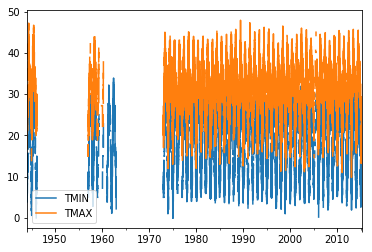

In [27]:
tmp.plot()

We can reference each column by its name:

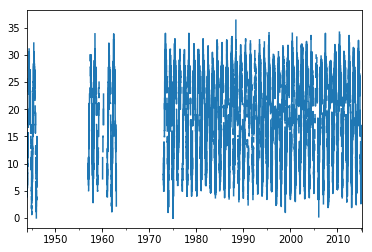

In [28]:
tmp['TMIN'].plot()

or as a method of the Data Frame variable (if name of the variable is a valid python name):

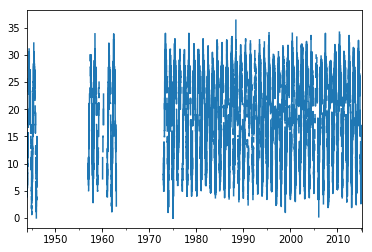

In [29]:
tmp.TMIN.plot()

We can simply add column to the Data Frame:

In [30]:
tmp['mean'] = (tmp['TMAX'] + tmp['TMIN'])/2.
tmp.head()

,TMIN,TMAX,mean
1944-01-01,NaN,22.2,NaN
1944-01-02,5.0,NaN,NaN
1944-01-03,3.9,23.9,13.9
1944-01-04,5.0,22.2,13.6
1944-01-05,6.1,NaN,NaN


In [31]:
tmp['Diff'] = tmp['TMAX'] - tmp['TMIN']
tmp.head()

,TMIN,TMAX,mean,Diff
1944-01-01,NaN,22.2,NaN,NaN
1944-01-02,5.0,NaN,NaN,NaN
1944-01-03,3.9,23.9,13.9,20.0
1944-01-04,5.0,22.2,13.6,17.2
1944-01-05,6.1,NaN,NaN,NaN


## Exercise
Find and plot all differences that are larger than 20

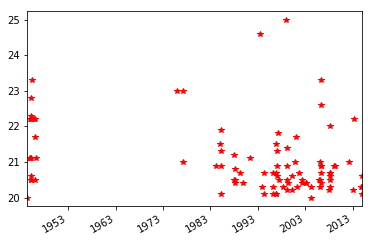

In [32]:
tmp.Diff[tmp.Diff > 20 ].plot(style='r*')

And delete it:

In [33]:
del tmp['Diff']
tmp.tail()

,TMIN,TMAX,mean
2015-02-25,NaN,28.6,NaN
2015-02-26,14.5,27.6,21.05
2015-02-27,11.1,27.6,19.35
2015-02-28,12.6,29.2,20.90
2015-03-01,NaN,NaN,NaN


Slicing will also work:

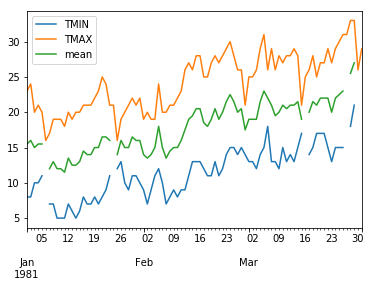

In [34]:
tmp['1981-01':'1981-03'].plot()

## Statistics

Back to simple stuff. We can obtain statistical information over elements of the Data Frame. Default is column wise:

In [35]:
tmp.mean()

TMIN    18.530961
TMAX    31.402131
mean    25.000823
dtype: float64

In [36]:
tmp.max()

TMIN    36.40
TMAX    47.90
mean    40.55
dtype: float64

In [37]:
tmp.min()

TMIN    0.0
TMAX    9.8
mean    7.0
dtype: float64

You can also do it row-wise:

In [38]:
tmp.mean

<bound method DataFrame.mean of             TMIN  TMAX   mean
1944-01-01   NaN  22.2    NaN
1944-01-02   5.0   NaN    NaN
1944-01-03   3.9  23.9  13.90
1944-01-04   5.0  22.2  13.60
1944-01-05   6.1   NaN    NaN
1944-01-06   NaN  22.8    NaN
1944-01-07   5.6  22.2  13.90
...          ...   ...    ...
2015-02-23  16.6  28.6  22.60
2015-02-24  15.2  28.6  21.90
2015-02-25   NaN  28.6    NaN
2015-02-26  14.5  27.6  21.05
2015-02-27  11.1  27.6  19.35
2015-02-28  12.6  29.2  20.90
2015-03-01   NaN   NaN    NaN

[25993 rows x 3 columns]>

In [39]:
tmp.mean(1)

1944-01-01    22.20
1944-01-02     5.00
1944-01-03    13.90
1944-01-04    13.60
1944-01-05     6.10
1944-01-06    22.80
1944-01-07    13.90
              ...  
2015-02-23    22.60
2015-02-24    21.90
2015-02-25    28.60
2015-02-26    21.05
2015-02-27    19.35
2015-02-28    20.90
2015-03-01      NaN
Freq: D, Length: 25993, dtype: float64

Or get everything at once:

In [40]:
tmp.describe()

,TMIN,TMAX,mean
count,14208.000000,15436.000000,12694.000000
mean,18.530961,31.402131,25.000823
std,7.808766,6.740111,7.020202
min,0.000000,9.800000,7.000000
25%,11.400000,26.200000,18.800000
50%,19.500000,32.600000,26.500000
75%,25.600000,36.100000,30.700000
max,36.400000,47.900000,40.550000


By the way getting correlation coefficients for members of the Data Frame is as simple as:

In [41]:
del tmp['mean']

In [42]:
tmp.corr()

,TMIN,TMAX
TMIN,1.000000,0.882849
TMAX,0.882849,1.000000


## Exercise

Find mean of all TMIN and TMAX temperatures larger than 20

## Resampling

Pandas provide easy way to resample data to different time frequency. Two main parameters for resampling is time period you resemple to and the method that you use. By default the method is mean. Following example calculates monthly ('M'):

In [ ]:
tmp.

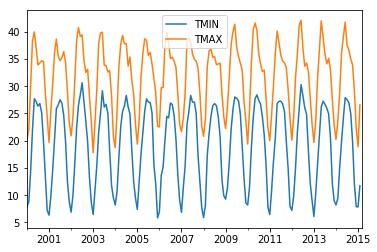

In [43]:
tmp_mm = tmp.resample("M").mean()
tmp_mm['2000':].plot()

You can use your methods for resampling, for example np.max (in this case we change resampling frequency to 3 years):

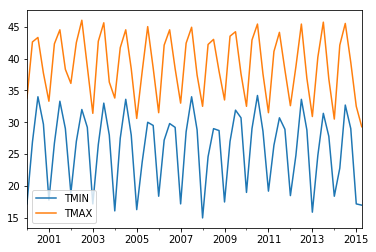

In [44]:
tmp_mm = tmp.resample("3M").apply(np.max)
tmp_mm['2000':].plot()

You can specify several functions at once as a list:

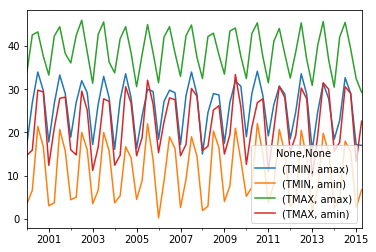

In [45]:
tmp_mm = tmp.resample("3M").apply([np.max, np.min])
tmp_mm['2000':].plot()

## Seasonal means with resample

Initially pandas was created for analysis of financial information and it thinks not in seasons, but in quarters. So we have to resample our data to quarters. We also need to make a shift from standard quarters, so they correspond with seasons. This is done by using 'Q-NOV' as a time frequency, indicating that year in our case ends in November:

In [46]:
q_mean = tmp.resample('Q-NOV').mean()
q_mean

,TMIN,TMAX
1944-02-29,7.802174,22.386486
1944-05-31,18.810909,36.321429
1944-08-31,26.178462,36.729825
1944-11-30,17.024528,32.702667
1945-02-28,6.944286,23.422414
1945-05-31,19.001695,36.496341
1945-08-31,26.761404,37.720290
...,...,...
2013-11-30,19.038636,31.909890
2014-02-28,8.851852,22.180000


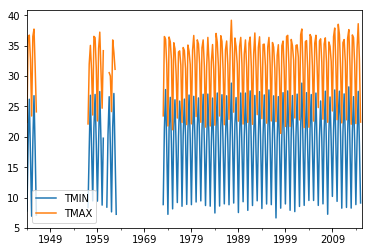

In [47]:
q_mean.plot()

Plot winters

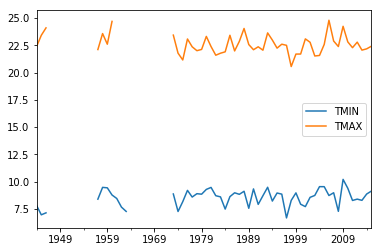

In [48]:
q_mean[q_mean.index.quarter==1].plot()

## Multi-year monthly means with groupby

First step will be to add another column to our DataFrame with month numbers:

In [49]:
tmp['mon'] = tmp.index.month
tmp

,TMIN,TMAX,mon
1944-01-01,NaN,22.2,1
1944-01-02,5.0,NaN,1
1944-01-03,3.9,23.9,1
1944-01-04,5.0,22.2,1
1944-01-05,6.1,NaN,1
1944-01-06,NaN,22.8,1
1944-01-07,5.6,22.2,1
...,...,...,...
2015-02-23,16.6,28.6,2
2015-02-24,15.2,28.6,2


Now we can use [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to group our values by months and calculate mean for each of the groups (month in our case):

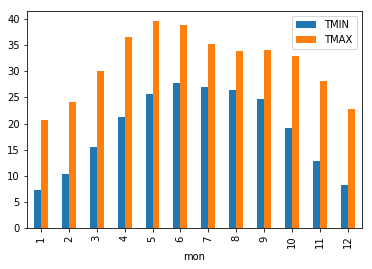

In [50]:
monmean = tmp['1950':'2013'].groupby('mon').aggregate(np.mean)
monmean.plot(kind='bar')

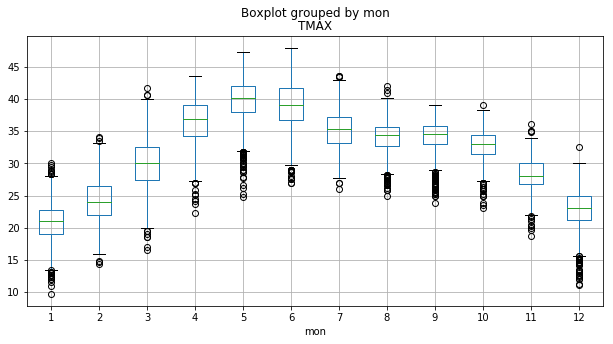

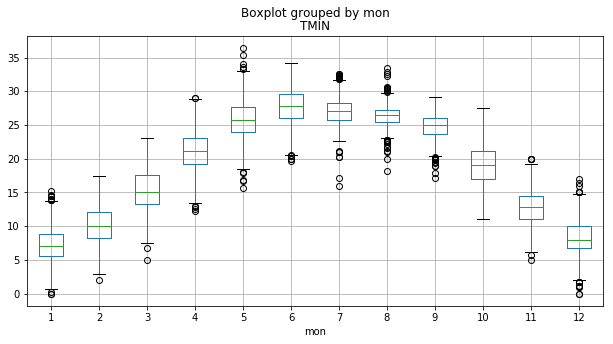

In [51]:
tmp.boxplot(column=['TMAX'], by='mon', figsize=(10,5))
tmp.boxplot(column=['TMIN'], by='mon', figsize=(10,5))

## Exercise

Define function that will find difference between maximum and minimum values of the resampled slice, and resample our `tmp` variable with this function.

## Interpolate

In [54]:
del tmp['mon']

Data often have gaps:

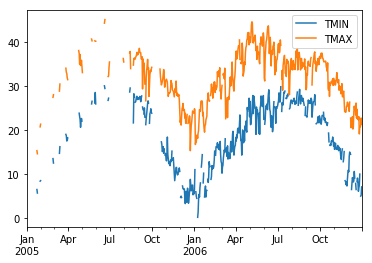

In [55]:
tmp['2005':'2006'].plot()

We can interpolate over this gaps using `interpolate` method:

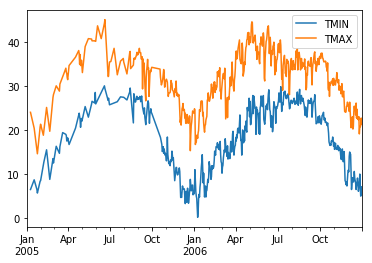

In [56]:
tmp['2005':'2006'].interpolate().plot()

In [57]:
tmp.interpolate?

Interpolation with use of another interpolation method:

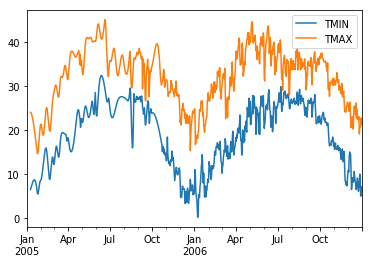

In [58]:
ax = tmp['2005':'2006'].interpolate(method='cubic').plot()


## Interactive data exploration

In [59]:
interpolated = tmp['1980':'2006'].interpolate(method='cubic')

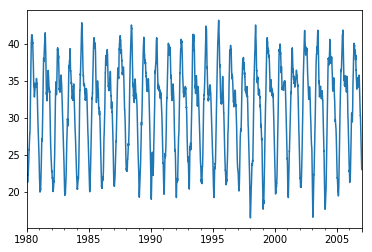

In [60]:
interpolated['TMAX'].rolling(window=30).mean().plot()

In [61]:
from ipywidgets import interact

In [62]:
def kp(window=10):
    interpolated[['TMAX']].rolling(window=window).mean().plot(ylim=(10,50))

In [63]:
cc = interact(kp, window=(10,70,5))

interactive(children=(IntSlider(value=10, description='window', max=70, min=10, step=5), Output()), _dom_classes=('widget-interact',))

## Links

[Time Series Data Analysis with pandas (Video)](http://www.youtube.com/watch?v=0unf-C-pBYE)

[Data analysis in Python with pandas (Video)](http://www.youtube.com/watch?v=w26x-z-BdWQ)

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)